In [130]:
import pandas as pd
import numpy as np
import json 
import os
import matplotlib.pyplot as plt


In [131]:
base_parameters={
    "cao_conversion":0.5,
    "T_water_prod_out":85,
    "storage_carbonator_distance":100,
    "delta_T_pinch":15,
    "calciner_capacity_factor":1,
    "calciner_cost_factor":1,
    "elec_price":0.165,
    "maintain_cost_indictor":0.025,
    "operation_hours":3435
}
results_folder="/home/anoldfriend/Workspace/MyRepo/thermodynamics/CaL/src/CaL-CC-HS/results"
variables={
    "cao_conversion":[0.2,0.3,0.4,0.5,0.6],
    "T_water_prod_out":[80,85,90,100,110],
    "storage_carbonator_distance":[50,100,200,300],
    "delta_T_pinch":[10,15,20,30],
    "calciner_capacity_factor":[1,1.5,2,2.5,3],
    "calciner_cost_factor":np.array([0.8,0.9,1,1.1,1.2])*base_parameters["calciner_cost_factor"],
    "elec_price":np.array([0.8,0.9,1,1.1,1.2])*base_parameters["elec_price"],
    "maintain_cost_indictor":[0.015,0.025,0.035,0.045],
    "operation_hours":[2000,3000,4000,5000,6000]
}

In [132]:
base_file=f"{results_folder}/base/base.json"
with open(base_file,"r") as fp:
    base_results=json.load(fp)

base_energy_efficiency=base_results["metrics"]["energy"]["heat_storage_eff"]
base_COC=base_results["comparison"]["specific_capture_cost"]
base_LCOH=base_results["comparison"]["LCOH1"]
base_specific_capture_energy=base_results["comparison"]["specific_capture_energy"]


In [133]:
energy_efficiency={}
COC={}
LCOH={}
specific_capture_energy={}
energy_efficiency_ratios={}
COC_ratios={}
LCOH_ratios={}
specific_capture_energy_ratios={}

for key_parameter in variables.keys():
    energy_efficiency[key_parameter]=[]
    energy_efficiency_ratios[key_parameter]=[]
    COC[key_parameter]=[]
    COC_ratios[key_parameter]=[]
    LCOH[key_parameter]=[]
    LCOH_ratios[key_parameter]=[]
    specific_capture_energy[key_parameter]=[]
    specific_capture_energy_ratios[key_parameter]=[]

    for value in variables[key_parameter]:
        dst=os.path.join(results_folder,key_parameter)
        if isinstance(value,int):
            file_name=f"{value}.json"
        else:
            file_name=f"{round(value,3)}.json"
        file_path=os.path.join(dst,file_name)
        with open(file_path,"r") as fp:
            results=json.load(fp)

        energy_efficiency[key_parameter].append(results["metrics"]["energy"]["heat_storage_eff"])
        energy_efficiency_ratios[key_parameter].append(results["metrics"]["energy"]["heat_storage_eff"]/base_energy_efficiency-1)
        
        COC[key_parameter].append(results["comparison"]["specific_capture_cost"])
        COC_ratios[key_parameter].append(results["comparison"]["specific_capture_cost"]/base_COC-1)

        LCOH[key_parameter].append(results["comparison"]["LCOH1"])
        LCOH_ratios[key_parameter].append(results["comparison"]["LCOH1"]/base_LCOH-1)

        specific_capture_energy[key_parameter].append(results["comparison"]["specific_capture_energy"])
        specific_capture_energy_ratios[key_parameter].append(results["comparison"]["specific_capture_energy"]/base_specific_capture_energy-1)


In [134]:
def get_min_max(data_dict):
    min_results=[]
    max_results=[]
    for key in data_dict.keys():
        min_results.append(np.min(list(data_dict[key])))
        max_results.append(np.max(list(data_dict[key])))
    return min_results,max_results


In [135]:
COC_mins,COC_maxs=get_min_max(COC)
COC_ratio_mins,COC_ratio_maxs=get_min_max(COC_ratios)

LCOH_mins,LCOH_maxs=get_min_max(LCOH)
LCOH_ratio_mins,LCOH_ratio_maxs=get_min_max(LCOH_ratios)

specific_capture_energy_mins,specific_capture_energy_maxs=get_min_max(specific_capture_energy)
specific_capture_energy_ratio_mins,specific_capture_energy_ratio_maxs=get_min_max(specific_capture_energy_ratios)

energy_efficiency_mins,energy_efficiency_maxs=get_min_max(energy_efficiency)
energy_efficiency_ratio_mins,energy_efficiency_ratio_maxs=get_min_max(energy_efficiency_ratios)

In [136]:
index=list(variables.keys())
index=["CaO conversion", "supply water temperature", "storage carbonator distance", 
        "pinch temperature","calciner capacity","calciner cost","electricity price",
        "maintain cost indictaor","operation hours"]

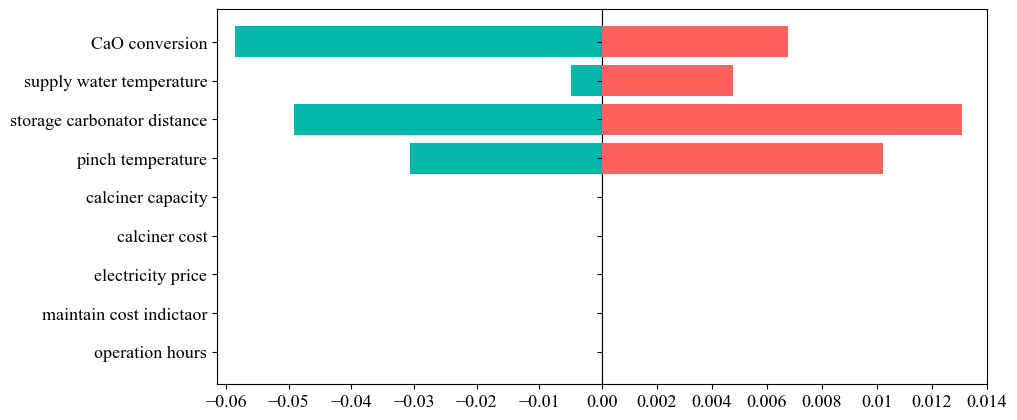

In [137]:


color_red = '#fd625e'
color_blue = '#01b8aa'
hfont = {'fontname':'Times New Roman'}
font_color = 'black'

fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(index, energy_efficiency_ratio_mins, align='center', color=color_blue, zorder=10)
axes[1].barh(index, energy_efficiency_ratio_maxs, align='center', color=color_red, zorder=10)

# axes[0].invert_xaxis() 
plt.gca().invert_yaxis()

axes[0].set(yticks=index, yticklabels=index)
axes[0].tick_params(axis='y', colors='black') # tick color
axes1_ticks= list(axes[1].get_xticks())
axes1_ticks.pop(0)
axes[1].set_xticks(axes1_ticks)
axes[1].set_xticklabels(axes1_ticks)

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
fig.savefig("./sa_efficiency.jpg", bbox_inches='tight')


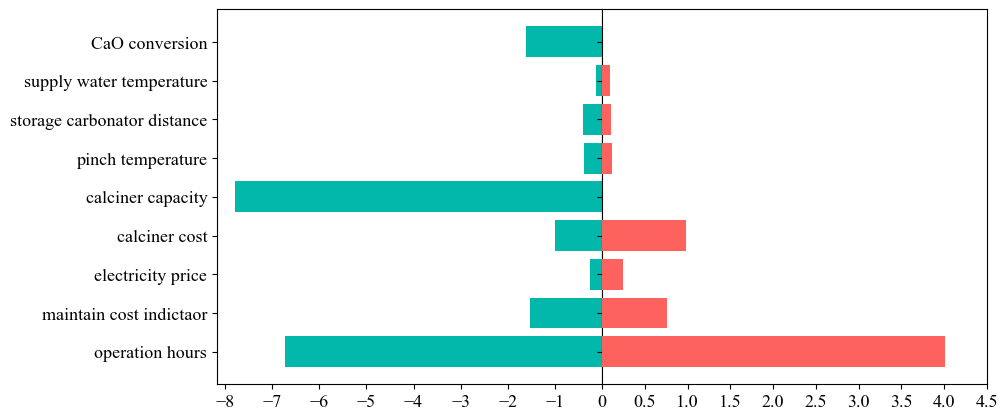

In [153]:


color_red = '#fd625e'
color_blue = '#01b8aa'
hfont = {'fontname':'Times New Roman'}
font_color = 'black'

fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(index, COC_ratio_mins, align='center', color=color_blue, zorder=10)
axes[1].barh(index, COC_ratio_maxs, align='center', color=color_red, zorder=10)

# axes[0].invert_xaxis() 
plt.gca().invert_yaxis()

axes[0].set(yticks=index, yticklabels=index)
axes[0].tick_params(axis='y', colors='black') # tick color
axes1_ticks= list(axes[1].get_xticks())
axes1_ticks.pop(0)
axes[1].set_xticks(axes1_ticks)
axes[1].set_xticklabels(axes1_ticks)

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
fig.savefig("./sa_COC.jpg", bbox_inches='tight')


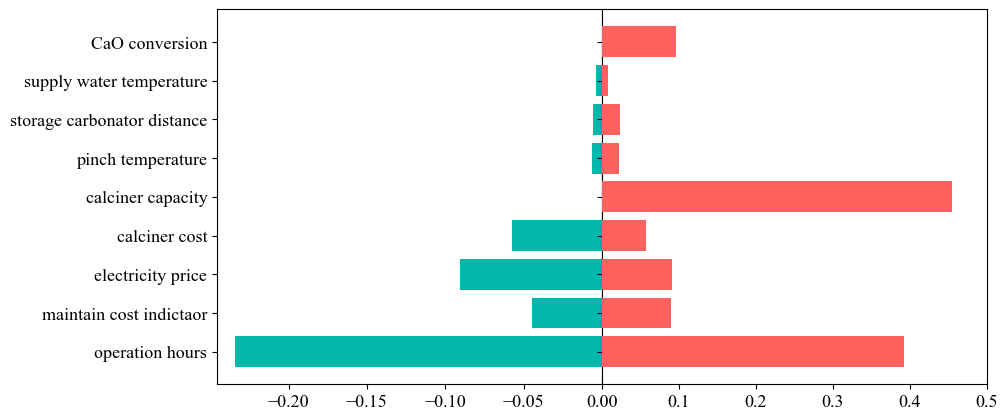

In [152]:


color_red = '#fd625e'
color_blue = '#01b8aa'
hfont = {'fontname':'Times New Roman'}
font_color = 'black'

fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(index, LCOH_ratio_mins, align='center', color=color_blue, zorder=10)
axes[1].barh(index, LCOH_ratio_maxs, align='center', color=color_red, zorder=10)

# axes[0].invert_xaxis() 
plt.gca().invert_yaxis()

axes[0].set(yticks=index, yticklabels=index)
axes[0].tick_params(axis='y', colors='black') # tick color
# axes1_ticks= list(axes[1].get_xticks())
axes1_ticks=[round(v,1) for v in list(axes[1].get_xticks())]
axes1_ticks.pop(0)
axes[1].set_xticks(axes1_ticks)
axes[1].set_xticklabels(axes1_ticks)

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
fig.savefig("./sa_LCOH.jpg", bbox_inches='tight')



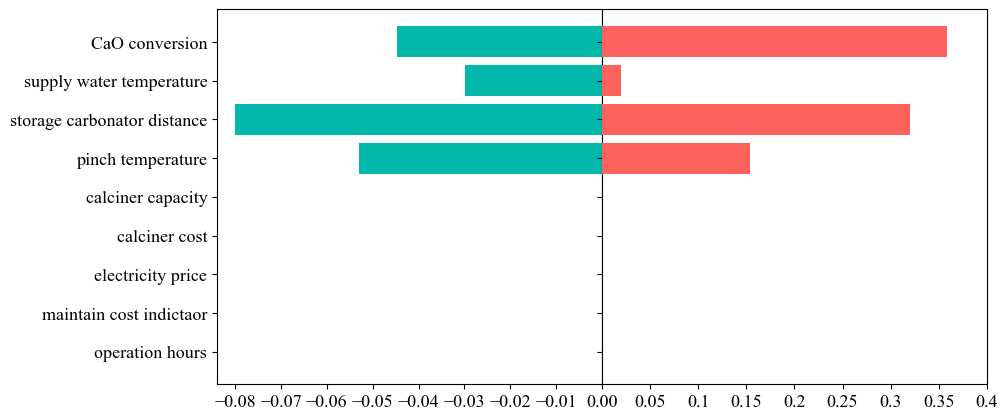

In [151]:


color_red = '#fd625e'
color_blue = '#01b8aa'
hfont = {'fontname':'Times New Roman'}
font_color = 'black'

fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(index, specific_capture_energy_ratio_mins, align='center', color=color_blue, zorder=10)
axes[1].barh(index, specific_capture_energy_ratio_maxs, align='center', color=color_red, zorder=10)

# axes[0].invert_xaxis() 
plt.gca().invert_yaxis()

axes[0].set(yticks=index, yticklabels=index)
axes[0].tick_params(axis='y', colors='black') # tick color
# axes1_ticks= list(axes[1].get_xticks())
axes1_ticks=[round(v,2) for v in list(axes[1].get_xticks())]
axes1_ticks.pop(0)
axes[1].set_xticks(axes1_ticks)
axes[1].set_xticklabels(axes1_ticks)

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
fig.savefig("./sa_specific_capture_energy.jpg", bbox_inches='tight')



array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ])